In [11]:
import pandas as pd
import apc
import warnings
warnings.simplefilter('ignore', FutureWarning)

In [12]:
sto_input = pd.read_excel('..\\sample\\triangulos_pagados.xlsx')
sto_input=sto_input.iloc[:,1:]
sto_input.index=[1,2,3,4,5,6,7,8,9,10]
model = apc.Model()
model.data_from_df(sto_input, data_format='CL')
model.fit_table('log_normal_response')
model.deviance_table

c:\Users\Alex\miniconda3\envs\apc_env3\lib\site-packages\statsmodels\regression\_tools.py:121: RuntimeWarning: divide by zero encountered in double_scalars
  scale = np.dot(wresid, wresid) / df_resid


,-2logL,df_resid,LR_vs_APC,df_vs_APC,F_vs_APC,P>F,aic
APC,-158.470164,28.0,NaN,NaN,NaN,NaN,-104.470164
AP,-122.103933,36.0,36.366231,8.0,3.279933,0.00914,-84.103933
AC,-95.935843,36.0,62.534321,8.0,7.410773,0.000029,-57.935843
PC,10.704412,36.0,169.174575,8.0,72.342918,0.0,48.704412
Ad,-74.052991,44.0,84.417173,16.0,6.371164,0.000011,-52.052991
Pd,14.471831,44.0,172.941995,16.0,38.860055,0.0,36.471831
Cd,14.421904,44.0,172.892068,16.0,38.823207,0.0,36.421904
A,-68.63144,45.0,89.838724,17.0,6.788218,0.000005,-48.63144
P,132.086224,45.0,290.556388,17.0,322.706639,0.0,152.086224
C,137.085129,45.0,295.555293,17.0,353.568125,0.0,157.085129


In [13]:
model.deviance_table[model.deviance_table['P>F'] > 0.05]

,-2logL,df_resid,LR_vs_APC,df_vs_APC,F_vs_APC,P>F,aic


In [14]:
for family in ('log_normal_response', 'od_poisson_response'):
    model_VNJ = apc.Model()
    model_VNJ.data_from_df(sto_input, data_format='CL')
    model_VNJ.fit(family, 'AC')
    
    sub_models_VNJ = [model_VNJ.sub_model(coh_from_to=(1,5)),
                     model_VNJ.sub_model(coh_from_to=(6,10))]

    bartlett_VNJ = apc.bartlett_test(sub_models_VNJ)
    f_VNJ = apc.f_test(model_VNJ, sub_models_VNJ)
    
    print(family)
    print('='*len(family))
    print('Bartlett test p-value: {:.2f}'.format(
        bartlett_VNJ['p_value']))
    print('F-test p-value: {:.2f} \n'.format(
        f_VNJ['p_value']))

log_normal_response
Bartlett test p-value: 0.67
F-test p-value: 0.08 

od_poisson_response
Bartlett test p-value: 0.82
F-test p-value: 0.00 



In [15]:
model_VNJ = apc.Model()
model_VNJ.data_from_df(sto_input, data_format='CL')
model_VNJ.fit('log_normal_response', 'AC')
print('log-data variance full model: {:.3f}'.format(model_VNJ.s2))
print('degrees of freedom full model: {:.0f}'.format(model_VNJ.df_resid))

log-data variance full model: 0.016
degrees of freedom full model: 36


In [16]:
sub_model_VNJ_1 = model_VNJ.sub_model(coh_from_to=(1,5), fit=True)
sub_model_VNJ_2 = model_VNJ.sub_model(coh_from_to=(6,10), fit=True)
print('First five accident years (I_1)')
print('-------------------------------')
print('log-data variance: {:.3f}'.format(sub_model_VNJ_1.s2))
print('degrees of freedom: {:.0f}\n'.format(sub_model_VNJ_1.df_resid))

print('Last five accident years (I_2)')
print('------------------------------')
print('log-data variance: {:.3f}'.format(sub_model_VNJ_2.s2))
print('degrees of freedom: {:.0f}'.format(sub_model_VNJ_2.df_resid))

First five accident years (I_1)
-------------------------------
log-data variance: 0.014
degrees of freedom: 26

Last five accident years (I_2)
------------------------------
log-data variance: 0.011
degrees of freedom: 6


In [17]:
s2_bar_VNJ = ((sub_model_VNJ_1.s2 * sub_model_VNJ_1.df_resid 
              + sub_model_VNJ_2.s2 * sub_model_VNJ_2.df_resid)
              /(sub_model_VNJ_1.df_resid + sub_model_VNJ_2.df_resid))
print('Weighted avg of log-data variance: {:.3f}'.format(s2_bar_VNJ))

Weighted avg of log-data variance: 0.014


In [18]:
bartlett_VNJ = apc.bartlett_test([sub_model_VNJ_1, sub_model_VNJ_2])
for key, value in bartlett_VNJ.items():
    print('{}: {:.2f}'.format(key, value))

B: 0.18
LR: 0.19
C: 1.06
m: 2.00
p_value: 0.67


In [19]:
F_VNJ_sigma2 = sub_model_VNJ_2.s2/sub_model_VNJ_1.s2
print('F statistic for common variances: {:.2f}'.format(F_VNJ_sigma2))

F statistic for common variances: 0.75


In [20]:
from scipy import stats
F_VNJ_sigma2_percentile = stats.f.cdf(
    F_VNJ_sigma2, dfn=sub_model_VNJ_2.df_resid, dfd=sub_model_VNJ_1.df_resid
)
print('Percentile of F statistic: {:.2f}'.format(F_VNJ_sigma2_percentile))

Percentile of F statistic: 0.38


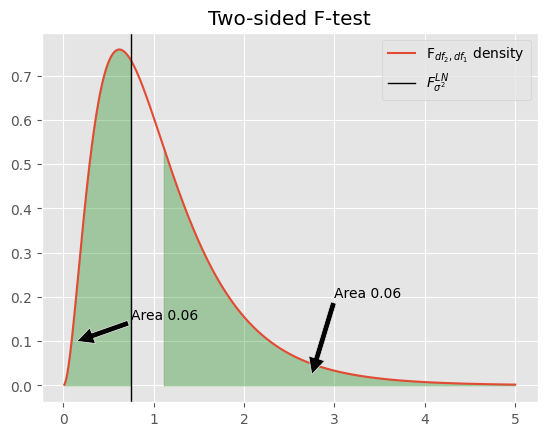

In [21]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

x = np.linspace(0.01,5,1000)
y = stats.f.pdf(x, 
            dfn=sub_model_VNJ_2.df_resid, 
            dfd=sub_model_VNJ_1.df_resid)
plt.figure()
plt.plot(x, y, label='$\mathrm{F}_{df_2, df_1}$ density')

plt.axvline(F_VNJ_sigma2, color='black', linewidth=1, label='$F^{LN}_{\sigma^2}$')
tmp = stats.f.cdf(F_VNJ_sigma2, 
                  dfn=sub_model_VNJ_2.df_resid, 
                  dfd=sub_model_VNJ_1.df_resid)
plt.fill_between(x[x < F_VNJ_sigma2], y[x < F_VNJ_sigma2], color='green', alpha=0.3)
tmp = stats.f.ppf(1-tmp,
                  dfn=sub_model_VNJ_2.df_resid, 
                  dfd=sub_model_VNJ_1.df_resid)
plt.fill_between(x[x > tmp], y[x > tmp], color='green', alpha=0.3)
plt.annotate('Area 0.06', xy=(0.15, 0.1), 
             xytext=(0.75, 0.15), arrowprops=dict(facecolor='black'))
plt.annotate('Area 0.06', xy=(2.75, 0.025), 
             xytext=(3, 0.2), arrowprops=dict(facecolor='black'))
plt.legend()
plt.title('Two-sided F-test')
plt.show()

In [23]:
f_linpred_VNJ = apc.f_test(model_VNJ, [sub_model_VNJ_1, sub_model_VNJ_2])

for key, value in f_linpred_VNJ.items():
    print('{}: {:.2f}'.format(key, value))

F_stat: 2.29
p_value: 0.08
